## Exploring Text Data

Working with text is generally more challenging than working with numerical data. Hence, any kind of technique that helps in generating an intuition of the existing dataset is welcome. One of the simplest approach to understand any text document or to compare multiple documents can be to compute a frequency table of individual words present in the document/documents and use it to conduct further experiements like: finding top words per document, finding top common words among documents etc.

In our case, we have taken the challenge of Analyzing Sentiments from Twitter data, so we will focus on how to generate word frequencies and use it to create **Word Clouds** in Python that will help us get a better overall understanding of the dataset.

**Note:-** We are using the same dataset from `yelp_ratings.csv` 

### Table of Contents
1. About the Dataset
2. Generating Word Frequency
3. EDA using Word Clouds
4. Why to Preprocess text data?

### 1. About the Dataset

The dataset that we are going to use is the yelp ratings.
Let's load the dataset using pandas and have a quick look at some sample reviews. 

In [7]:
#Load the dataset
import pandas as pd 
dataset = pd.read_csv('yelp_ratings.csv')

dataset.head()

,text,stars,sentiment
0,Total bill for this horrible service? Over $8G...,1.0,0
1,I *adore* Travis at the Hard Rock's new Kelly ...,5.0,1
2,I have to say that this office really has it t...,5.0,1
3,Went in for a lunch. Steak sandwich was delici...,5.0,1
4,Today was my second out of three sessions I ha...,1.0,0


As can be seen above, **text** column is of interest to us as it contains the review. Let's go ahead and inspect some of the reviews.

### 2. Generating Word Frequency

Let's first generate a frequency table of all the words present in all the reviews combined.

In [8]:
def gen_freq(text):
    #Will store the list of words
    word_list = []

    #Loop over all the reviews and extract words into word_list
    for tw_words in text.split():
        word_list.extend(tw_words)

    #Create word frequencies using word_list
    word_freq = pd.Series(word_list).value_counts()

    #Print top 20 words
    word_freq[:20]
    
    return word_freq

words_freq = gen_freq(dataset.text.str)

### 3. EDA using Word Clouds

Now that you have succesfully created a frequency table, you can use that to create multiple **visualizations** in the form of word clouds. Sometimes, the quickest way to understand the context of the text data is using a word cloud of top 100-200 words. Let's see how to create that in Python.

`pip install wordcloud`

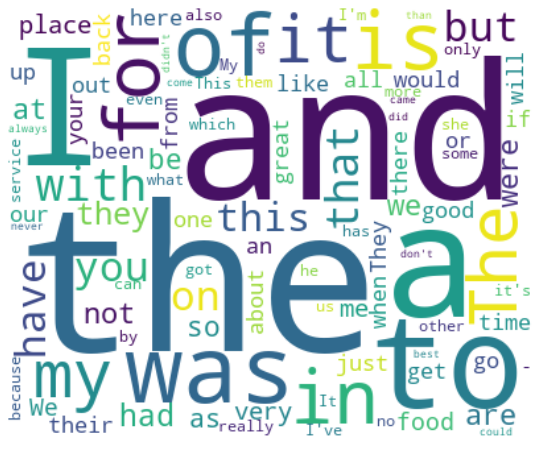

In [9]:
#Import libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#Generate word cloud
wc = WordCloud(width=400, height=330, max_words=100, background_color='white').generate_from_frequencies(words_freq)

plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

**Few things to Note:-**

1. Stop words like "the", "in", "to", "of" etc. are obviously ranking among the top frequency words but these are just constructs of the English language and are not specific to the people's reviews.
2. Words like "good" have occured multiple times. The reason for this is that the current text is not **Normalized** so words like "good", "great" etc. are all considered as different words.

The above are some of the problems that we need to address in order to make better visualization. Let's solve some of the problems!

#### Text Cleaning

You can utilize Regex to do text cleaning, that is precisely what we are doing here.

In [10]:
import re

def clean_text(text):
    
    #Remove punctuations
    text = re.sub(r'[?!.;:,#@-]', '', text)

    #Convert to lowercase to maintain consistency
    text = text.lower()
    return text

let's remove the common stop words.

#### Stop words Removal
WordCloud provides its own stopwords list. You can have a look at it by- 


In [11]:
#Import list of stopwards
from wordcloud import STOPWORDS

print(STOPWORDS)

{'their', "aren't", 'ought', 'that', 'more', 'by', "we're", "they're", 'the', 'yours', "i'll", "he's", "isn't", 'into', 'just', "it's", 'myself', 'did', 'had', 'i', 'so', "you're", 'not', "that's", 'during', 'them', 'too', 'otherwise', 'own', 'down', 'they', 'have', 'be', "he'll", 'under', 'r', 'my', 'since', 'http', 'cannot', 'or', "you'd", 'am', 'ourselves', "won't", 'but', "why's", 'how', 'hence', 'and', 'below', 'over', 'from', 'further', "weren't", 'if', 'such', "don't", "let's", 'when', "haven't", 'ours', 'its', 'before', 'any', 'for', 'herself', 'than', "here's", "he'd", 'at', 'very', 'it', 'therefore', 'could', 'doing', 'same', 'this', 'some', 'he', "how's", 'of', "hasn't", 'being', 'once', 'these', 'about', 'between', "she's", 'we', 'she', 'does', "she'd", "when's", 'on', "i'm", 'theirs', "didn't", 'again', 'after', 'with', 'yourselves', "you'll", 'are', "where's", "who's", 'else', 'above', 'should', 'having', 'other', 'k', 'no', 'against', "mustn't", 'what', 'himself', 'like'

Now that you know what all has to be changed to improve our word cloud, let's make some wordclouds. We'll call the previous functions of `clean_text()` and `gen_freq()` to perform cleaning and frequency computation operation respectively and drop the words present in `STOPWORDS` from the `words_freq` dictionary.

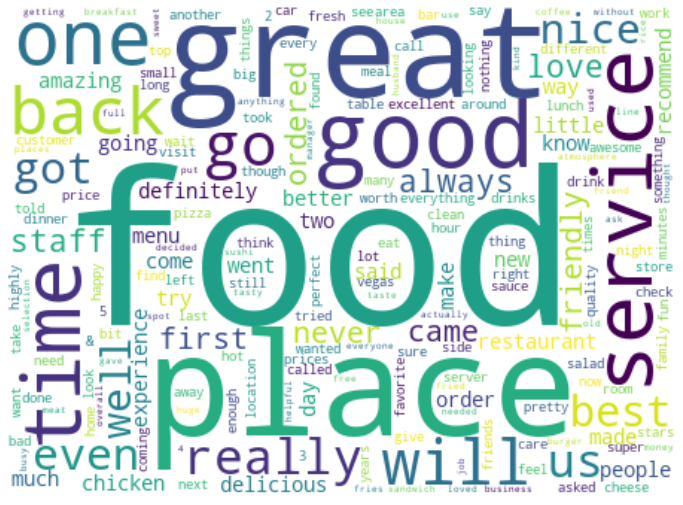

In [12]:
text = dataset.text.apply(lambda x: clean_text(x))
word_freq = gen_freq(text.str)*100
word_freq = word_freq.drop(labels=STOPWORDS, errors='ignore')

#Generate word cloud
wc = WordCloud(width=450, height=330, max_words=200, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 14))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Now that we have succesfully created a wordcloud, we can get some insight into the areas of interest of the general yelp re:views

 - It is evident that people are talking about food, service place etc. 
 - look more positive sentiment by words good great, nice, love etc.
 
### 4. Why to Preprocess text data?

As you may have already seen that without performing preprocessing operations like cleaning, removing stopwords and changing case in the dataset the representation always comes out wrong. In this case, it was that the wordcloud was full of noise but in other cases it might be your Machine Learning model that is going to suffer.
